In [0]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [0]:
from tensorflow.keras.datasets import mnist

In [0]:
(X_train,y_train),(X_test,y_test) = mnist.load_data()

11493376/11490434 [==============================] - 0s 0us/step


In [0]:
X_train.shape

(60000, 28, 28)

In [0]:
X_train[1]

array([[  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,  51, 159, 253, 159,  50,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,  48, 238, 252, 252, 252, 237,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  

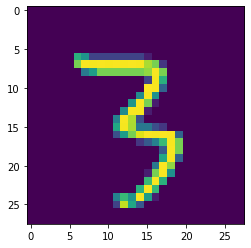

In [0]:
plt.imshow(X_train[44])

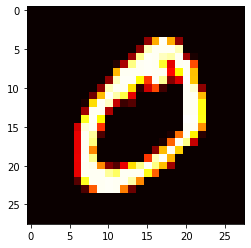

In [0]:
plt.imshow(X_train[1],cmap='hot')

In [0]:
y_train

array([5, 0, 4, ..., 5, 6, 8], dtype=uint8)

In [0]:
from tensorflow.keras.utils import to_categorical

In [0]:
y_train.shape

(60000,)

In [0]:
y_example = to_categorical(y_train)

In [0]:
y_train[0]

5

In [0]:
y_example[0]

array([0., 0., 0., 0., 0., 1., 0., 0., 0., 0.], dtype=float32)

In [0]:
y_cat_test = to_categorical(y_test)

In [0]:
y_cat_test.shape

(10000, 10)

In [0]:
y_test.shape

(10000,)

In [0]:
y_cat_train = to_categorical(y_train)

In [0]:
X_train[1].max()

255

In [0]:
X_train[1].min()

0

In [0]:
y_train

array([5, 0, 4, ..., 5, 6, 8], dtype=uint8)

In [0]:
X_train=X_train/255

In [0]:
X_test = X_test/255

In [0]:
X_train[0].min()

0.0

In [0]:
X_train.shape

(60000, 28, 28)

In [0]:
X_train = X_train.reshape(60000,28,28,1)

In [0]:
X_train.shape

(60000, 28, 28, 1)

In [0]:
X_test.shape

(10000, 28, 28)

In [0]:
X_test = X_test.reshape(10000,28,28,1)

In [0]:
X_test.shape

(10000, 28, 28, 1)

In [0]:
from tensorflow.keras.models import Sequential

In [0]:
from tensorflow.keras.layers import Dense,Conv2D,MaxPool2D,Flatten

In [0]:
model = Sequential()

model.add(Conv2D(filters=32,kernel_size=(4,4),input_shape=(28,28,1),activation='relu'))
model.add(MaxPool2D(pool_size=(2,2)))
model.add(Conv2D(filters=32,kernel_size=(4,4),input_shape=(28,28,1),activation='relu'))
model.add(MaxPool2D(pool_size=(2,2)))

model.add(Flatten())
model.add(Dense(128,activation='relu'))

model.add(Dense(10,activation='softmax'))

model.compile(loss='categorical_crossentropy',optimizer='adam',
              metrics=['accuracy'])







In [0]:
model.summary()

Model: "sequential_1"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_1 (Conv2D)            (None, 25, 25, 32)        544       
_________________________________________________________________
max_pooling2d_1 (MaxPooling2 (None, 12, 12, 32)        0         
_________________________________________________________________
conv2d_2 (Conv2D)            (None, 9, 9, 32)          16416     
_________________________________________________________________
max_pooling2d_2 (MaxPooling2 (None, 4, 4, 32)          0         
_________________________________________________________________
flatten_1 (Flatten)          (None, 512)               0         
_________________________________________________________________
dense_2 (Dense)              (None, 128)               65664     
_________________________________________________________________
dense_3 (Dense)              (None, 10)               

In [0]:
from tensorflow.keras.callbacks import EarlyStopping
early_stop = EarlyStopping(monitor='val_loss',patience=1)

In [0]:
model.fit(X_train,y_cat_train,epochs=15,validation_data=(X_test,y_cat_test),callbacks=[early_stop])

Epoch 1/15
1875/1875 [==============================] - 42s 23ms/step - loss: 0.1446 - accuracy: 0.9566 - val_loss: 0.0417 - val_accuracy: 0.9861
Epoch 2/15
1875/1875 [==============================] - 43s 23ms/step - loss: 0.0455 - accuracy: 0.9858 - val_loss: 0.0315 - val_accuracy: 0.9897
Epoch 3/15
1875/1875 [==============================] - 44s 23ms/step - loss: 0.0334 - accuracy: 0.9892 - val_loss: 0.0287 - val_accuracy: 0.9900
Epoch 4/15
1875/1875 [==============================] - 43s 23ms/step - loss: 0.0251 - accuracy: 0.9920 - val_loss: 0.0305 - val_accuracy: 0.9910


In [0]:
loss = pd.DataFrame(model.history.history)

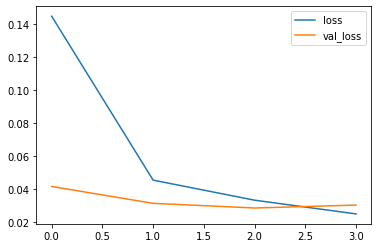

In [0]:
loss[['loss','val_loss']].plot()

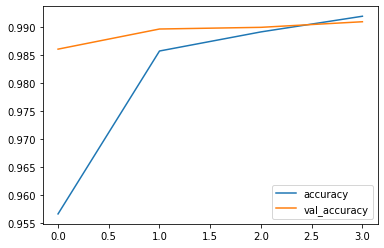

In [0]:
loss[['accuracy','val_accuracy']].plot()

In [0]:
model.metrics_names

['loss', 'accuracy']

In [0]:
model.evaluate(X_test,y_cat_test)

313/313 [==============================] - 2s 7ms/step - loss: 0.0305 - accuracy: 0.9910


[0.030467037111520767, 0.9909999966621399]

In [0]:
from sklearn.metrics import classification_report,confusion_matrix

In [0]:
predictions= model.predict_classes(X_test)

Instructions for updating:
Please use instead:* `np.argmax(model.predict(x), axis=-1)`,   if your model does multi-class classification   (e.g. if it uses a `softmax` last-layer activation).* `(model.predict(x) > 0.5).astype("int32")`,   if your model does binary classification   (e.g. if it uses a `sigmoid` last-layer activation).


In [0]:
y_test

array([7, 2, 1, ..., 4, 5, 6], dtype=uint8)

In [0]:
print(classification_report(predictions,y_test))

              precision    recall  f1-score   support

           0       0.99      1.00      0.99       978
           1       1.00      0.99      0.99      1139
           2       1.00      0.99      0.99      1036
           3       1.00      0.98      0.99      1031
           4       1.00      0.99      0.99       990
           5       0.99      0.99      0.99       887
           6       0.98      1.00      0.99       942
           7       0.99      0.99      0.99      1028
           8       0.99      0.99      0.99       970
           9       0.99      0.99      0.99       999

    accuracy                           0.99     10000
   macro avg       0.99      0.99      0.99     10000
weighted avg       0.99      0.99      0.99     10000



In [0]:
confusion_matrix(y_test,predictions)

array([[ 974,    0,    0,    0,    1,    1,    2,    1,    1,    0],
       [   0, 1131,    0,    1,    0,    0,    0,    1,    2,    0],
       [   1,    1, 1027,    0,    0,    0,    0,    3,    0,    0],
       [   0,    0,    2, 1008,    0,    0,    0,    0,    0,    0],
       [   0,    0,    1,    0,  978,    0,    0,    0,    0,    3],
       [   0,    0,    1,   10,    0,  879,    1,    0,    1,    0],
       [   2,    2,    1,    1,    9,    2,  939,    0,    2,    0],
       [   0,    4,    3,    2,    0,    0,    0, 1018,    0,    1],
       [   1,    0,    1,    7,    0,    2,    0,    0,  962,    1],
       [   0,    1,    0,    2,    2,    3,    0,    5,    2,  994]])

In [0]:
import seaborn as sns

/usr/local/lib/python3.6/dist-packages/statsmodels/tools/_testing.py:19: FutureWarning: pandas.util.testing is deprecated. Use the functions in the public API at pandas.testing instead.
  import pandas.util.testing as tm


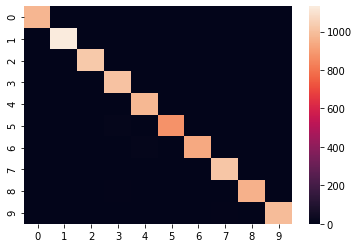

In [0]:
sns.heatmap(confusion_matrix(y_test,predictions))

In [0]:
no =X_test[0]

In [0]:
no.shape

(28, 28, 1)

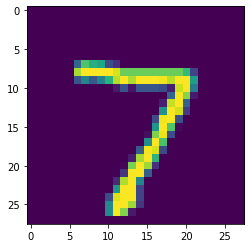

In [0]:
plt.imshow(no.reshape(28,28))

In [0]:
model.predict_classes(no.reshape(1,28,28,1))

array([7])

In [0]:
X_train.shape

(60000, 28, 28, 1)